# Lab 3 : Supersonic Flow over Diamond 
---


## Function Library


In [2]:
# packages used 
import numpy as np
import matplotlib.pyplot as plt
import cv2

# image resolution default
sizeh = 800 #px horizontal
sizev = 600 #px vertical

#---------------------------------------------------#
                ## FUNCTION LIBRARY ##
#---------------------------------------------------#

# Image read and show function CV2
def show(path,width,height,name = "noname"):
    img = cv2.imread(path)
    
    if img is None:
        print("try again, path is ill")
        return
    
    img = cv2.resize(img,(width,height))

    cv2.imshow(name, img)   
    
    while True:
        k = cv2.waitKey(0) & 0xFF
        if k == ord('q'):
            cv2.destroyAllWindows()
            break

points = []

def calibrationfactor(dist_px, n, griddist_mm=5):
    """
    Choose n grid points in the image to compute calibration factor.
    """ 
    return dist_px / (n * griddist_mm)  # px/mm

def select_points(event, x, y, flags, param):
    global points
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        # print(f"Point selected: {x}, {y}")
        # Draw a marker on the image at the clicked point
        cv2.circle(img, (x, y), radius=5, color=(0, 0, 255), thickness=-1)  # Red filled circle
        cv2.imshow("Select Two Points", img)  # Refresh the image window

# Main function to run the image selection and distance calculation in x
def mainx(image_path, n = 10, griddist_mm=5):
    global img
    
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img,(sizeh,sizev))


    if img is None:
        print("Error: Could not load image.")
        return

    # Display the image and set up the mouse callback
    cv2.imshow("Select Two Points", img)
    cv2.setMouseCallback("Select Two Points", select_points)

    print(f"Select two points {n} grid points apart on the image by clicking.")
    
    # Wait until two points are selected
    while len(points) < 2:
        cv2.waitKey(1)

    # Get the selected points
    p1, p2 = points[:2]
    print(f"Selected points: {p1}, {p2}")

    # Calculate pixel distance
    pixel_distance = abs(p2[0] - p1[0])
    print(f"Pixel Distance: {pixel_distance} px")

    # Compute calibration factors (px/mm)
    f = calibrationfactor(pixel_distance, n, griddist_mm)

    while True:
        k = cv2.waitKey(0) & 0xFF
        if k == ord('q'):
            points.clear()
            cv2.destroyAllWindows()
            break
    return f

# Main function to run the image selection and distance calculation in y direction
def mainy(image_path, n, griddist_mm=5):
    global img
    
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img,(sizeh,sizev))

    if img is None:
        print("Error: Could not load image.")
        return

    # Display the image and set up the mouse callback
    cv2.imshow("Select Two Points", img)
    cv2.setMouseCallback("Select Two Points", select_points)

    print(f"Select two points {n} grid points apart on the image by clicking.")
    
    # Wait until two points are selected
    while len(points) < 2:
        cv2.waitKey(1)

    # Get the selected points
    p1, p2 = points[:2]
    print(f"Selected points: {p1}, {p2}")

    # Calculate pixel distance
    pixel_distance = abs(p2[1] - p1[1])
    print(f"Pixel Distance: {pixel_distance} px")

    # Compute calibration factors (px/mm)
    f = calibrationfactor(pixel_distance, n, griddist_mm)

    while True:
        k = cv2.waitKey(0) & 0xFF
        if k == ord('q'):
            points.clear()
            cv2.destroyAllWindows()
            break
    return f

def correction(image, fx,fy,sizeh,sizev):
    print(f"Original Image Resolution is {sizeh} x {sizev} px")

    image_path = image
    img = cv2.imread(image_path)

    original = cv2.resize(img,(sizeh,sizev))

    if fx > fy:
        factor = fy/fx 
        sizehcorr = round(sizeh*factor)
        print(f"Scale Factor for the horizontal direction is {factor}"
            f"\nNew horizontal image size in pixels is {sizehcorr}")
        correctresolution = [sizehcorr, sizev]
        corrected = cv2.resize(img,(sizehcorr,sizev))
    elif fy < fx:
        factor = fx/fy
        sizevcorr = round(sizev*factor)
        print(f"Scale Factor for the vertical direction is {factor}"
            f"\nNew vertical image size in pixels is {sizevcorr}")
        correctresolution = [sizeh, sizevcorr]
        corrected = cv2.resize(img,(sizeh,sizevcorr))

    Titles =["Original", "Corrected"]
    images =[original,corrected]
  
    plt.figure(figsize=[15,10])
    for idx,pic in enumerate(images):
        l = 100

        plt.subplot(2, 1, idx + 1)
        plt.title(Titles[idx])
        plt.plot([sizeh/2]*l,np.linspace(0,sizev,l))
        plt.plot(np.linspace(0,sizev,l),[sizev/2]*l)
        plt.imshow(pic)

    plt.show()
    return correctresolution

#---------------------------------------------------##---------------------------------------------------#
#---------------------------------------------------##---------------------------------------------------#

### Calibration Factor

RUN THE ABOVE BLOCK TO INITIALIZE 

Problem 7a on Lab 3:

- Undistort Three Images 

Change Image path to test other images if desired

In [4]:

# ---------------------------------------------------------------------------------
# Find Calibration Factor
# ---------------------------------------------------------------------------------\
grid_path = r"..\images\diamond-wind-off-grid.bmp"

print("Find Calibration Factor in x (horizontal) first\n")
fx= mainx(grid_path, n=10, griddist_mm=5)

print("\nNow y (vertical)\n")
fy = mainy(grid_path, n=10, griddist_mm=5) 

print(f"\nPixels to mm in X direction = {fx}", f"\nPixels to mm in Y direction = {fy}")

if fx > fy:
    print(f"Image is stretched in the X direction")
elif fx < fy:
    print(f"Image is stretched in the Y direction")
else:
    print(f"Image is correct.")
print("\n--------------------------------------\n")
# ---------------------------------------------------------------------------------

Find Calibration Factor in x (horizontal) first

Select two points 10 grid points apart on the image by clicking.
Selected points: (104, 512), (557, 520)
Pixel Distance: 453 px

Now y (vertical)

Select two points 10 grid points apart on the image by clicking.
Selected points: (105, 512), (112, 90)
Pixel Distance: 422 px

Pixels to mm in X direction = 9.06 
Pixels to mm in Y direction = 8.44
Image is stretched in the X direction

--------------------------------------



### Corrected Images

Selected image Grid Image
Original Image Resolution is 800 x 600 px
Scale Factor for the horizontal direction is 0.9315673289183222
New horizontal image size in pixels is 745


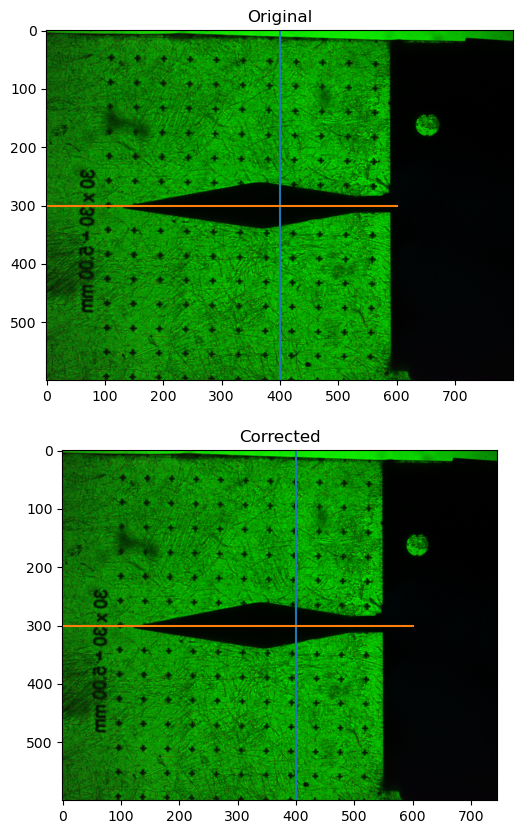


Showing corrected image for Grid Image


In [6]:
# Select Image
select = 4

sizeh = 800 #px horizontal
sizev = 600 #px vertical

# Image path matched
match select:
    case 1:
        name = "Mach 2 flow over Diamond at 0 degree AoA"
        print(f"Selected image {name}")

        image_path = r"..\images\diamond_vertical_AoA0_M2.bmp"
    case 3: 
        name = "Mach 3 flow over Diamond at 7 degree AoA"
        print(f"Selected image {name}")

        image_path = r"..\images\diamond_vertical_AoA7deg_M3.bmp"
    case 2: 
        name = "Mach 2.5 flow over Diamond at 0 degree AoA"
        print(f"Selected image {name}")
        image_path = r"..\images\diamond_vertical_AoA0_M225.bmp"
    case 4: 
        name = "Grid Image"
        print(f"Selected image {name}")
        image_path = r"..\images\diamond-wind-off-grid.bmp"



[sizeh,sizev] = correction(image_path,fx,fy,sizeh,sizev)


print(f"\nShowing corrected image for {name}")
show(image_path,sizeh,sizev,name)